## Non-Cartesian MRI With BART

This demo ([source](https://mrirecon.github.io/bart/examples.html)), showcases BART's ability to simuate non-cartesian sampling trajectories, generate representative phantoms, and reconstruct images using the non-uniform FFT (nuFFT)

In [1]:
import bartpy.tools as bart
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Generate a trajectory

traj_rad = bart.traj(r=True, x=512, y=64)

In [3]:
help(bart.ssa)

Help on function ssa in module bartpy.tools.tools:

ssa(src, w=None, z=None, m=None, n=None, r=None, g=None)
    Perform SSA-FARY or Singular Spectrum Analysis. <src>: [samples, coordinates]
    
    :param src array:
    :param w int: Window length 
    :param z bool: Zeropadding [Default: True] 
    :param m int: Remove mean [Default: True] 
    :param n int: Normalize [Default: False] 
    :param r int: Rank for backprojection. r < 0: Throw away first r components. r > 0: Use only first r components. 
    :param g long: Bitmask for Grouping (long value!)



In [4]:
# Scale the trajectory

traj_rad2 = bart.scale(traj_rad, 0.5)

In [5]:
# Use the t (trajectory) option to simulate a phantom with a non-cartesian sampling trajectory

ksp_sim = bart.phantom(k=True, s=8, t=traj_rad2)

In [6]:
traj_rad2 = bart.scale(traj_rad, 0.6)

In [7]:
# inverse gridding

igrid = bart.nufft(traj_rad2, ksp_sim, i=True, t=True)

In [8]:
reco1 = bart.rss(igrid, 8)

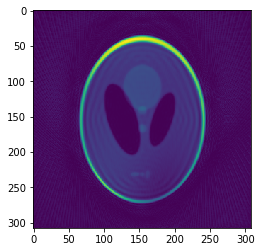

In [9]:
plt.imshow(abs(reco1))

In [10]:
lowres_img = bart.nufft(traj_rad2, ksp_sim, i=True, d=[24,24,1], t=True)
lowres_ksp = bart.fft(lowres_img, 7, u=True)

In [11]:
ksp_zerop = bart.resize(lowres_ksp, [0, 1], [308, 308], c=True)

In [14]:
sens, _ = bart.ecalib(ksp_zerop, m=1)

In [15]:
sens.shape

(308, 308, 1, 8)

In [16]:
reco2 = bart.pics(ksp_sim, sens, S=True, r=0.001, t=traj_rad2)

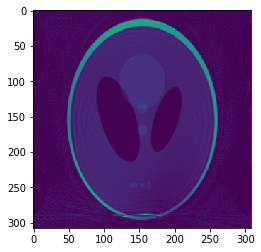

In [17]:
plt.imshow(abs(reco2))